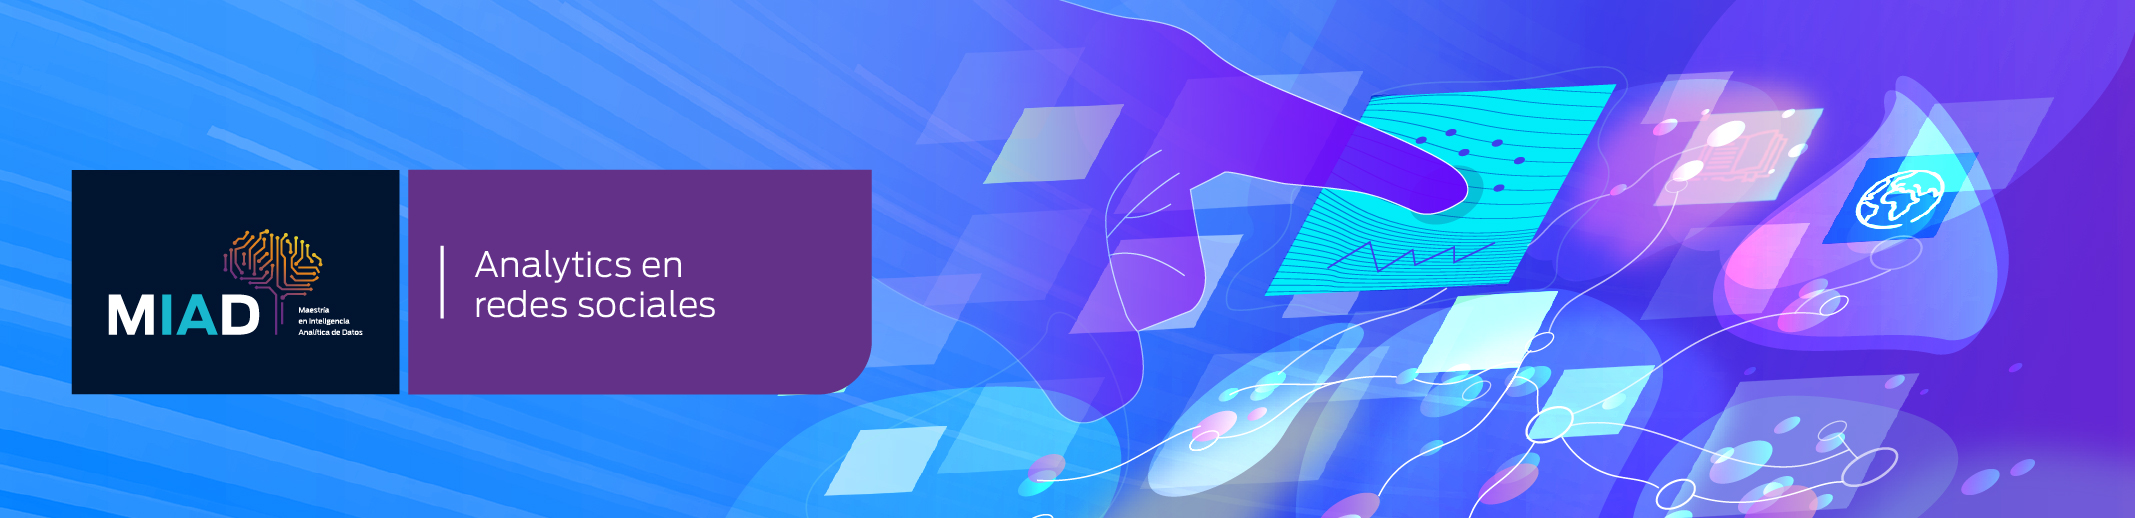

# Tutorial: Implementación de algoritmo de Louvain en Python

En este notebook usted aprenderá a implementar el algoritmo de Louvain para detección de comunidades, para lo cuál usará la librería ``community``.

Este cuaderno está diseñado como guía para que detecte las comunidades dentro de la estructura de una red por medio del algoritmo de Louvain. Por lo tanto, en el cuaderno encontrará un ejercicio guiado en el que aplicará y visualizará el algoritmo.

#### Expectativas del tutorial

En este tutorial esperamos que usted logre adquirir las siguientes habilidades:
+ Instalar la librería *community*
+ Correr el algoritmo de Louvain
+ Identificar las comunidades
+ Visualizar las comunidades

#### Tabla de contenido
+ [Inicialización](#iniciar)
+ [Algoritmo de Louvain](#lou)
+ [Instalar y correr algoritmo de Louvain](#correr)
+ [Visualizar las comunidades](#visua)

<a id = "iniciar"></a>
### Inicialización
Para empezar, se debe importar las librerías base, con las que usted ya se ha familiarizado.

In [1]:
# Importar las librerias a usar
import networkx as nx
import matplotlib.pyplot as plt

Ahora, utilicemos la librería de NetworkX para generar una red sobre la cual trabajar. En específico, usemos el algoritmo de Newman Watts Strogatz, que toma un número de nodos, el número posible de conexiones de cada nodo y la probabilidad de conexión para generar una red.

Para este ejercicio vamos a generar una red de 50 nodos, con 7 posibles conexiones cada uno, una probabilidad de conexión de 50% y, de forma opcional, vamos a definir la semilla de generación aleatoria número 5 para mantener consistencia en los resultados.

In [2]:
# Generar la red bajo el algoritmo de Newman Watts Strogatz
G=nx.newman_watts_strogatz_graph(n=50, k= 7, p=0.5, seed=5)

Una vez construida la red vamos a visualizarla.

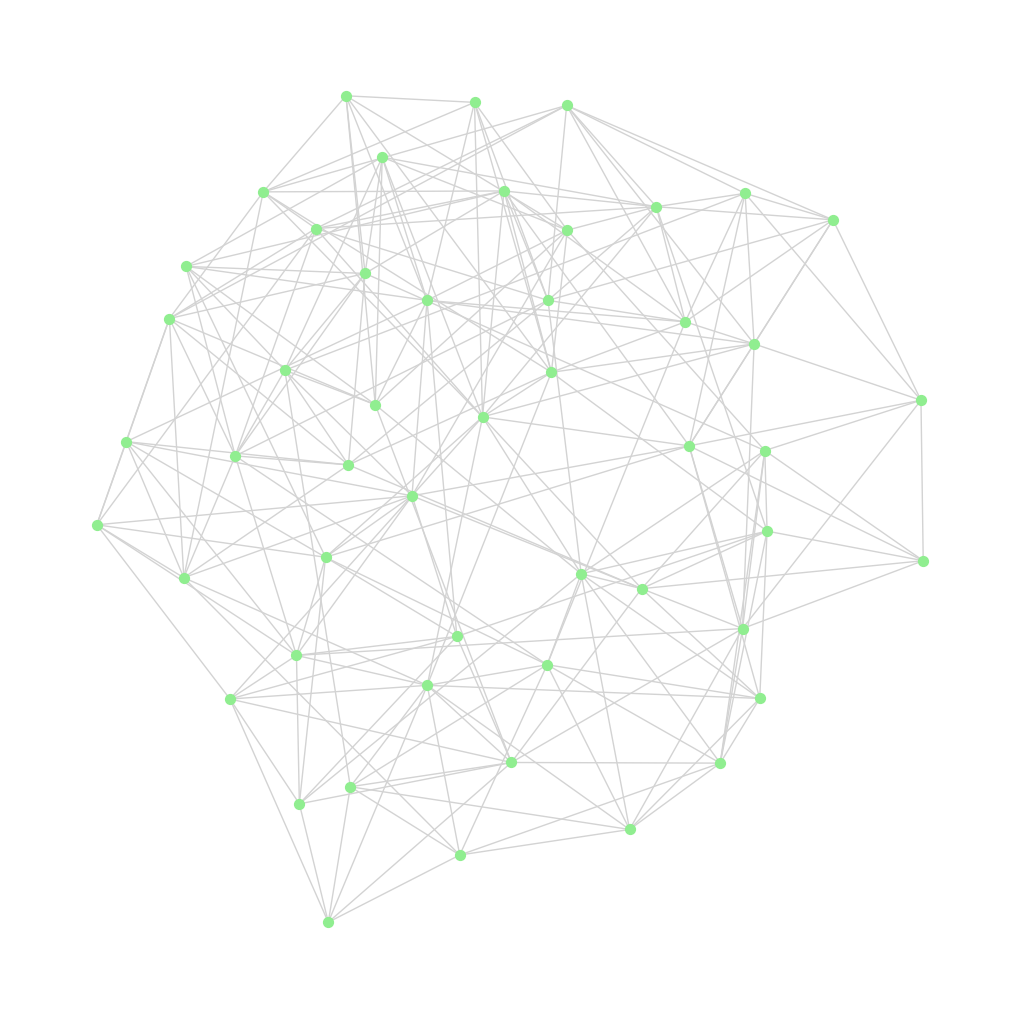

In [3]:
# Dimensionar la gráfica
fig=plt.figure(figsize=(10,10))

# Generar la gráfica
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')

Encuentre a continuación la cantidad de arcos que posee la red.

*Respuesta esperada:* ``227``.

In [4]:
# Número de arcos de la red
G.number_of_edges()

227

<a id = "lou"></a>
### Algoritmo de Louvain
El algoritmo de Louvain permite identificar comunidades maximizando la modularidad de la red. Este algoritmo posee dos fases para iterar:

**Fase 1**
-	En primer lugar, se asigna una comunidad diferente a cada nodo de la red. Por lo tanto, en esta partición inicial hay tantas comunidades como nodos.
-	Para cada nodo i se considera a cada uno sus vecinos j, y se evalúa el incremento en la modularidad producto de asignar el nodo i en la comunidad de j.
-	A continuación, el nodo i se asigna en la comunidad que maximice la ganancia positiva en la modularidad. 
-	Si no es posible una ganancia positiva, el nodo i permanece en su comunidad original.

**Fase 2**<br>
Construir una nueva red cuyos nodos sean ahora las comunidades formadas en la 1a fase. 
-	Los pesos de las conexiones entre los nuevos nodos se dan por la suma del peso de las conexiones entre los nodos de las dos comunidades correspondientes.
-	A continuación, es posible volver a aplicar la fase 1 del algoritmo a la red ponderada resultante e iterar.

<a id = "correr"></a>
### Instalar algoritmo de Louvain
Antes de poder usar el algoritmo es necesario instalar la librería en su computador, para esto se corre la siguiente línea de código. Una vez instalada no es necesario volver a instalarla en el futuro.

`` !pip install python-louvain``

Una vez instalada podemos importarla.

In [ ]:
# Correr solo si es la primera vez que se instala en el computador
!pip install python-louvain

In [6]:
# Importemos la libreria community
import community

Para correr el algoritmo usamos ``community.best_partition(red)``, lo que genera la partición en forma de diccionario donde las llaves son los nodos de la red y el valor es la comunidad del nodo.

In [10]:
# Correr el algoritmo
partition = community.best_partition(G)

Para realizar diferentes análisis es de gran utilidad guardar las comunidades en una variable en forma de lista, tal y como se hace a continuación.

In [12]:
#Guardemos las comunidades de cada nodo
values = [partition.get(node) for node in G.nodes()]

Con la lista definida anteriormente, encuentre el número de comunidades.<br>
*Ayuda:* puede usar``len(set())``.

In [14]:
# Número de comunidades
len(set(values))


4

<a id = "visua"></a>
### Visualizar las comunidades
La visualización de las comunidades es un procedimiendo similar al que se ha utilizado anteriormente. Para estar parte vamos a utilizar los colores de los nodos en el grafo para representar la comunidad a la que pertenece cada uno. Para lo anterior podemos usar la variable ``values`` que creamos anteriormente, como se realiza a continuación:

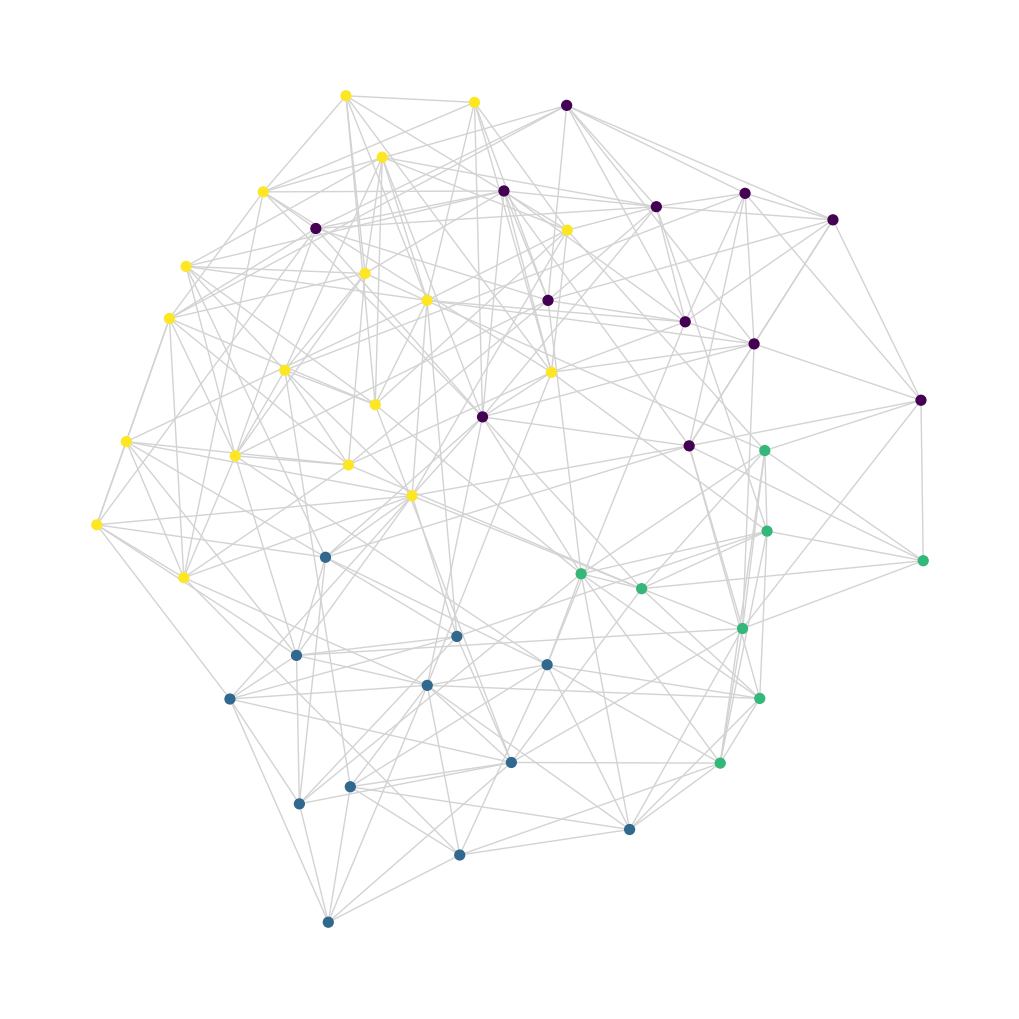

In [15]:
# Dimencionar gráfica
plt.figure(figsize=(10,10))

# Graficar la red con los colores de cada nodo representando las comunidades
nx.draw_kamada_kawai(G,node_color = values, node_size=50, edge_color='lightgray')